# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [2]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [3]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [4]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [5]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

# H0 (answer in words):
Low levels of masculinity in male characters do not affect fanfiction success when controlling for publication year and lexical richness


##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


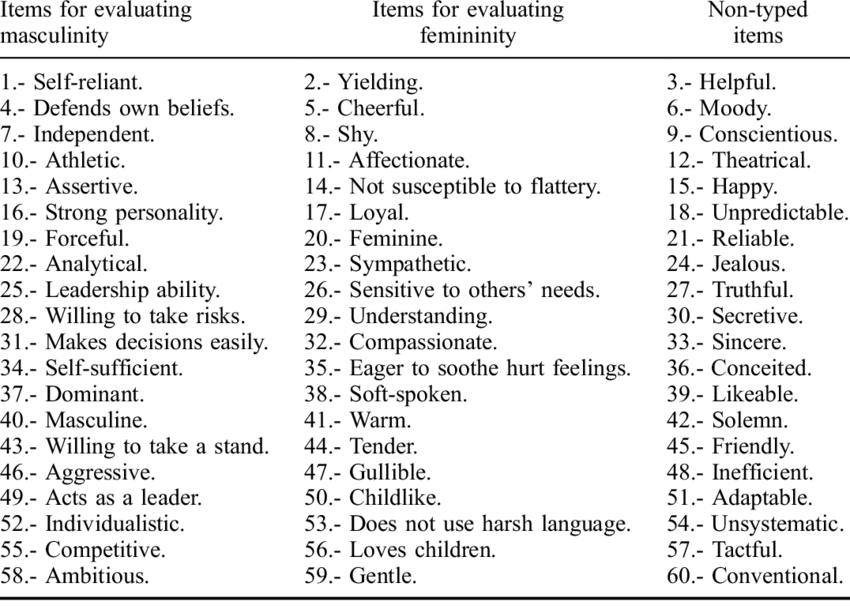

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

Now we have prepared all the dependencies needed.

In [15]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [7]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [8]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'

riveter = Riveter()
riveter.load_sap_lexicon('power')
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [21]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter.train(segments,
              text_ids,
              persona_patterns_dict={'masculine': r'^he$|^him$|^himself$',
                                     })


    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|▋                                                              | 1/90 [00:06<09:52,  6.65s/it]

2024-03-15 12:00:16 Complete!
Story ID: 4706144, Masculine Power Score: 0.09090909090909091



Processing stories:   2%|█▍                                                             | 2/90 [00:12<09:15,  6.31s/it]

2024-03-15 12:00:22 Complete!
Story ID: 4752980, Masculine Power Score: 0.25



Processing stories:   3%|██                                                             | 3/90 [00:18<09:07,  6.29s/it]

2024-03-15 12:00:29 Complete!
Story ID: 4621698, Masculine Power Score: 0.5714285714285714



Processing stories:   4%|██▊                                                            | 4/90 [00:26<09:47,  6.83s/it]

2024-03-15 12:00:36 Complete!
Story ID: 3651108, Masculine Power Score: 0.11764705882352941



Processing stories:   6%|███▌                                                           | 5/90 [00:33<09:44,  6.88s/it]

2024-03-15 12:00:43 Complete!
Story ID: 5282729, Masculine Power Score: 0.2



Processing stories:   7%|████▏                                                          | 6/90 [00:41<09:59,  7.14s/it]

2024-03-15 12:00:51 Complete!
Story ID: 5533886, Masculine Power Score: 0.0



Processing stories:   8%|████▉                                                          | 7/90 [00:49<10:24,  7.53s/it]

2024-03-15 12:00:59 Complete!
Story ID: 4547622, Masculine Power Score: 0.05714285714285714



Processing stories:   9%|█████▌                                                         | 8/90 [00:57<10:30,  7.69s/it]

2024-03-15 12:01:07 Complete!
Story ID: 16177508, Masculine Power Score: 0.13333333333333333



Processing stories:  10%|██████▎                                                        | 9/90 [01:05<10:18,  7.64s/it]

2024-03-15 12:01:15 Complete!
Story ID: 15745185, Masculine Power Score: -0.10526315789473684



Processing stories:  11%|██████▉                                                       | 10/90 [01:11<09:44,  7.31s/it]

2024-03-15 12:01:21 Complete!
Story ID: 15654528, Masculine Power Score: 0.18604651162790697



Processing stories:  12%|███████▌                                                      | 11/90 [01:17<09:10,  6.97s/it]

2024-03-15 12:01:28 Complete!
Story ID: 7448155, Masculine Power Score: 0.325



Processing stories:  13%|████████▎                                                     | 12/90 [01:25<09:10,  7.05s/it]

2024-03-15 12:01:35 Complete!
Story ID: 4983847, Masculine Power Score: 0.10344827586206896



Processing stories:  14%|████████▉                                                     | 13/90 [01:32<09:10,  7.15s/it]

2024-03-15 12:01:42 Complete!
Story ID: 3313118, Masculine Power Score: -0.23333333333333334



Processing stories:  16%|█████████▋                                                    | 14/90 [01:39<08:55,  7.04s/it]

2024-03-15 12:01:49 Complete!
Story ID: 3290390, Masculine Power Score: -0.10638297872340426



Processing stories:  17%|██████████▎                                                   | 15/90 [01:46<09:01,  7.21s/it]

2024-03-15 12:01:57 Complete!
Story ID: 36435301, Masculine Power Score: 0.05555555555555555



Processing stories:  18%|███████████                                                   | 16/90 [01:53<08:49,  7.15s/it]

2024-03-15 12:02:04 Complete!
Story ID: 36575491, Masculine Power Score: 0.2631578947368421



Processing stories:  19%|███████████▋                                                  | 17/90 [02:00<08:31,  7.00s/it]

2024-03-15 12:02:10 Complete!
Story ID: 35225224, Masculine Power Score: 0.24324324324324326



Processing stories:  20%|████████████▍                                                 | 18/90 [02:07<08:15,  6.88s/it]

2024-03-15 12:02:17 Complete!
Story ID: 4594527, Masculine Power Score: 0.2222222222222222



Processing stories:  21%|█████████████                                                 | 19/90 [02:13<07:45,  6.56s/it]

2024-03-15 12:02:23 Complete!
Story ID: 5485625, Masculine Power Score: 0.10909090909090909



Processing stories:  22%|█████████████▊                                                | 20/90 [02:19<07:36,  6.52s/it]

2024-03-15 12:02:29 Complete!
Story ID: 36408319, Masculine Power Score: 0.15789473684210525



Processing stories:  23%|██████████████▍                                               | 21/90 [02:27<08:10,  7.12s/it]

2024-03-15 12:02:38 Complete!
Story ID: 35762659, Masculine Power Score: 0.21428571428571427



Processing stories:  24%|███████████████▏                                              | 22/90 [02:35<08:09,  7.20s/it]

2024-03-15 12:02:45 Complete!
Story ID: 35603194, Masculine Power Score: 0.3684210526315789



Processing stories:  26%|███████████████▊                                              | 23/90 [02:42<07:58,  7.14s/it]

2024-03-15 12:02:52 Complete!
Story ID: 35344306, Masculine Power Score: 0.1388888888888889



Processing stories:  27%|████████████████▌                                             | 24/90 [02:48<07:34,  6.88s/it]

2024-03-15 12:02:58 Complete!
Story ID: 36695155, Masculine Power Score: 0.1



Processing stories:  28%|█████████████████▏                                            | 25/90 [02:56<07:38,  7.05s/it]

2024-03-15 12:03:06 Complete!
Story ID: 36064474, Masculine Power Score: 0.1



Processing stories:  29%|█████████████████▉                                            | 26/90 [03:03<07:34,  7.10s/it]

2024-03-15 12:03:13 Complete!
Story ID: 36024820, Masculine Power Score: 0.16666666666666666



Processing stories:  30%|██████████████████▌                                           | 27/90 [03:11<07:46,  7.40s/it]

2024-03-15 12:03:21 Complete!
Story ID: 35182330, Masculine Power Score: 0.06818181818181818



Processing stories:  31%|███████████████████▎                                          | 28/90 [03:18<07:41,  7.45s/it]

2024-03-15 12:03:29 Complete!
Story ID: 36567496, Masculine Power Score: 0.21052631578947367



Processing stories:  32%|███████████████████▉                                          | 29/90 [03:26<07:40,  7.55s/it]

2024-03-15 12:03:36 Complete!
Story ID: 35560330, Masculine Power Score: 0.13333333333333333



Processing stories:  33%|████████████████████▋                                         | 30/90 [03:34<07:28,  7.48s/it]

2024-03-15 12:03:44 Complete!
Story ID: 35877496, Masculine Power Score: 0.125



Processing stories:  34%|█████████████████████▎                                        | 31/90 [03:41<07:13,  7.35s/it]

2024-03-15 12:03:51 Complete!
Story ID: 35957410, Masculine Power Score: 0.2857142857142857



Processing stories:  36%|██████████████████████                                        | 32/90 [03:48<07:05,  7.33s/it]

2024-03-15 12:03:58 Complete!
Story ID: 30947654, Masculine Power Score: 0.04



Processing stories:  37%|██████████████████████▋                                       | 33/90 [03:55<06:52,  7.23s/it]

2024-03-15 12:04:05 Complete!
Story ID: 36332707, Masculine Power Score: -0.09523809523809523



Processing stories:  38%|███████████████████████▍                                      | 34/90 [04:03<07:01,  7.53s/it]

2024-03-15 12:04:13 Complete!
Story ID: 35967940, Masculine Power Score: 0.16071428571428573



Processing stories:  39%|████████████████████████                                      | 35/90 [04:10<06:51,  7.49s/it]

2024-03-15 12:04:21 Complete!
Story ID: 35001073, Masculine Power Score: 0.05



Processing stories:  40%|████████████████████████▊                                     | 36/90 [04:18<06:51,  7.62s/it]

2024-03-15 12:04:29 Complete!
Story ID: 35138911, Masculine Power Score: 0.1388888888888889



Processing stories:  41%|█████████████████████████▍                                    | 37/90 [04:25<06:33,  7.42s/it]

2024-03-15 12:04:36 Complete!
Story ID: 35280397, Masculine Power Score: 0.22727272727272727



Processing stories:  42%|██████████████████████████▏                                   | 38/90 [04:33<06:28,  7.48s/it]

2024-03-15 12:04:43 Complete!
Story ID: 36049939, Masculine Power Score: 0.2708333333333333



Processing stories:  43%|██████████████████████████▊                                   | 39/90 [04:41<06:27,  7.60s/it]

2024-03-15 12:04:51 Complete!
Story ID: 34995673, Masculine Power Score: 0.16363636363636364



Processing stories:  44%|███████████████████████████▌                                  | 40/90 [04:51<06:51,  8.23s/it]

2024-03-15 12:05:01 Complete!
Story ID: 33477346, Masculine Power Score: 0.43333333333333335



Processing stories:  46%|████████████████████████████▏                                 | 41/90 [04:58<06:35,  8.06s/it]

2024-03-15 12:05:08 Complete!
Story ID: 36840832, Masculine Power Score: -0.23076923076923078



Processing stories:  47%|████████████████████████████▉                                 | 42/90 [05:05<06:10,  7.73s/it]

2024-03-15 12:05:15 Complete!
Story ID: 30896276, Masculine Power Score: 0.14285714285714285



Processing stories:  48%|█████████████████████████████▌                                | 43/90 [05:13<06:01,  7.68s/it]

2024-03-15 12:05:23 Complete!
Story ID: 37363471, Masculine Power Score: 0.42857142857142855



Processing stories:  49%|██████████████████████████████▎                               | 44/90 [05:21<06:01,  7.86s/it]

2024-03-15 12:05:31 Complete!
Story ID: 36984901, Masculine Power Score: 0.0



Processing stories:  50%|███████████████████████████████                               | 45/90 [05:30<06:04,  8.09s/it]

2024-03-15 12:05:40 Complete!
Story ID: 33353644, Masculine Power Score: -0.05660377358490566



Processing stories:  51%|███████████████████████████████▋                              | 46/90 [05:38<06:03,  8.27s/it]

2024-03-15 12:05:48 Complete!
Story ID: 37002835, Masculine Power Score: -0.14285714285714285



Processing stories:  52%|████████████████████████████████▍                             | 47/90 [05:47<05:55,  8.27s/it]

2024-03-15 12:05:57 Complete!
Story ID: 5630824, Masculine Power Score: 0.3157894736842105



Processing stories:  53%|█████████████████████████████████                             | 48/90 [05:55<05:50,  8.34s/it]

2024-03-15 12:06:05 Complete!
Story ID: 10053617, Masculine Power Score: 0.25806451612903225



Processing stories:  54%|█████████████████████████████████▊                            | 49/90 [06:04<05:43,  8.37s/it]

2024-03-15 12:06:14 Complete!
Story ID: 1572659, Masculine Power Score: 0.23333333333333334



Processing stories:  56%|██████████████████████████████████▍                           | 50/90 [06:13<05:45,  8.65s/it]

2024-03-15 12:06:23 Complete!
Story ID: 7450573, Masculine Power Score: 0.1



Processing stories:  57%|███████████████████████████████████▏                          | 51/90 [06:22<05:39,  8.72s/it]

2024-03-15 12:06:32 Complete!
Story ID: 6918676, Masculine Power Score: 0.05263157894736842



Processing stories:  58%|███████████████████████████████████▊                          | 52/90 [06:32<05:52,  9.27s/it]

2024-03-15 12:06:42 Complete!
Story ID: 6075402, Masculine Power Score: 0.36363636363636365



Processing stories:  59%|████████████████████████████████████▌                         | 53/90 [06:42<05:42,  9.27s/it]

2024-03-15 12:06:52 Complete!
Story ID: 11101779, Masculine Power Score: 0.3333333333333333



Processing stories:  60%|█████████████████████████████████████▏                        | 54/90 [06:51<05:39,  9.43s/it]

2024-03-15 12:07:01 Complete!
Story ID: 11321331, Masculine Power Score: 0.08108108108108109



Processing stories:  61%|█████████████████████████████████████▉                        | 55/90 [06:59<05:06,  8.76s/it]

2024-03-15 12:07:09 Complete!
Story ID: 12284853, Masculine Power Score: 0.022222222222222223



Processing stories:  62%|██████████████████████████████████████▌                       | 56/90 [07:06<04:42,  8.30s/it]

2024-03-15 12:07:16 Complete!
Story ID: 12282003, Masculine Power Score: 0.08888888888888889



Processing stories:  63%|███████████████████████████████████████▎                      | 57/90 [07:12<04:13,  7.67s/it]

2024-03-15 12:07:22 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|███████████████████████████████████████▉                      | 58/90 [07:19<03:56,  7.38s/it]

2024-03-15 12:07:29 Complete!
Story ID: 4228053, Masculine Power Score: 0.21739130434782608



Processing stories:  66%|████████████████████████████████████████▋                     | 59/90 [07:25<03:43,  7.20s/it]

2024-03-15 12:07:36 Complete!
Story ID: 12127317, Masculine Power Score: 0.13513513513513514



Processing stories:  67%|█████████████████████████████████████████▎                    | 60/90 [07:32<03:26,  6.88s/it]

2024-03-15 12:07:42 Complete!
Story ID: 12010134, Masculine Power Score: 0.21739130434782608



Processing stories:  68%|██████████████████████████████████████████                    | 61/90 [07:39<03:21,  6.94s/it]

2024-03-15 12:07:49 Complete!
Story ID: 11510919, Masculine Power Score: 0.4230769230769231



Processing stories:  69%|██████████████████████████████████████████▋                   | 62/90 [07:46<03:19,  7.11s/it]

2024-03-15 12:07:56 Complete!
Story ID: 8145802, Masculine Power Score: 0.22727272727272727



Processing stories:  70%|███████████████████████████████████████████▍                  | 63/90 [07:54<03:17,  7.32s/it]

2024-03-15 12:08:04 Complete!
Story ID: 6637942, Masculine Power Score: -0.13043478260869565



Processing stories:  71%|████████████████████████████████████████████                  | 64/90 [08:01<03:11,  7.37s/it]

2024-03-15 12:08:12 Complete!
Story ID: 7427905, Masculine Power Score: -0.02702702702702703



Processing stories:  72%|████████████████████████████████████████████▊                 | 65/90 [08:08<03:00,  7.23s/it]

2024-03-15 12:08:19 Complete!
Story ID: 3893857, Masculine Power Score: 0.1206896551724138



Processing stories:  73%|█████████████████████████████████████████████▍                | 66/90 [08:15<02:51,  7.15s/it]

2024-03-15 12:08:25 Complete!
Story ID: 33040258, Masculine Power Score: 0.25



Processing stories:  74%|██████████████████████████████████████████████▏               | 67/90 [08:22<02:43,  7.10s/it]

2024-03-15 12:08:32 Complete!
Story ID: 33858850, Masculine Power Score: -0.16666666666666666



Processing stories:  76%|██████████████████████████████████████████████▊               | 68/90 [08:29<02:36,  7.10s/it]

2024-03-15 12:08:40 Complete!
Story ID: 2775776, Masculine Power Score: 0.25



Processing stories:  77%|███████████████████████████████████████████████▌              | 69/90 [08:36<02:28,  7.06s/it]

2024-03-15 12:08:47 Complete!
Story ID: 3197963, Masculine Power Score: 0.3



Processing stories:  78%|████████████████████████████████████████████████▏             | 70/90 [08:44<02:21,  7.08s/it]

2024-03-15 12:08:54 Complete!
Story ID: 12395199, Masculine Power Score: 0.14634146341463414



Processing stories:  79%|████████████████████████████████████████████████▉             | 71/90 [08:51<02:14,  7.07s/it]

2024-03-15 12:09:01 Complete!
Story ID: 10934010, Masculine Power Score: 0.2962962962962963



Processing stories:  80%|█████████████████████████████████████████████████▌            | 72/90 [08:58<02:07,  7.06s/it]

2024-03-15 12:09:08 Complete!
Story ID: 12301116, Masculine Power Score: 0.034482758620689655



Processing stories:  81%|██████████████████████████████████████████████████▎           | 73/90 [09:05<02:00,  7.12s/it]

2024-03-15 12:09:15 Complete!
Story ID: 12706317, Masculine Power Score: -0.08695652173913043



Processing stories:  82%|██████████████████████████████████████████████████▉           | 74/90 [09:12<01:55,  7.23s/it]

2024-03-15 12:09:22 Complete!
Story ID: 11499468, Masculine Power Score: 0.06896551724137931



Processing stories:  83%|███████████████████████████████████████████████████▋          | 75/90 [09:18<01:42,  6.85s/it]

2024-03-15 12:09:28 Complete!
Story ID: 12184146, Masculine Power Score: 0.32



Processing stories:  84%|████████████████████████████████████████████████████▎         | 76/90 [09:24<01:32,  6.62s/it]

2024-03-15 12:09:35 Complete!
Story ID: 12201333, Masculine Power Score: 0.12



Processing stories:  86%|█████████████████████████████████████████████████████         | 77/90 [09:32<01:29,  6.91s/it]

2024-03-15 12:09:42 Complete!
Story ID: 11496030, Masculine Power Score: 0.16



Processing stories:  87%|█████████████████████████████████████████████████████▋        | 78/90 [09:39<01:23,  6.95s/it]

2024-03-15 12:09:49 Complete!
Story ID: 11510277, Masculine Power Score: 0.16216216216216217



Processing stories:  88%|██████████████████████████████████████████████████████▍       | 79/90 [09:47<01:18,  7.15s/it]

2024-03-15 12:09:57 Complete!
Story ID: 10772274, Masculine Power Score: 0.3793103448275862



Processing stories:  89%|███████████████████████████████████████████████████████       | 80/90 [09:53<01:10,  7.06s/it]

2024-03-15 12:10:04 Complete!
Story ID: 12646050, Masculine Power Score: 0.041666666666666664



Processing stories:  90%|███████████████████████████████████████████████████████▊      | 81/90 [10:00<01:01,  6.81s/it]

2024-03-15 12:10:10 Complete!
Story ID: 11161479, Masculine Power Score: -0.013157894736842105



Processing stories:  91%|████████████████████████████████████████████████████████▍     | 82/90 [10:08<00:57,  7.19s/it]

2024-03-15 12:10:18 Complete!
Story ID: 12069936, Masculine Power Score: 0.061224489795918366



Processing stories:  92%|█████████████████████████████████████████████████████████▏    | 83/90 [10:15<00:51,  7.30s/it]

2024-03-15 12:10:25 Complete!
Story ID: 12285972, Masculine Power Score: 0.41935483870967744



Processing stories:  93%|█████████████████████████████████████████████████████████▊    | 84/90 [10:22<00:43,  7.20s/it]

2024-03-15 12:10:32 Complete!
Story ID: 12372702, Masculine Power Score: -0.03571428571428571



Processing stories:  94%|██████████████████████████████████████████████████████████▌   | 85/90 [10:29<00:35,  7.10s/it]

2024-03-15 12:10:39 Complete!
Story ID: 12610496, Masculine Power Score: 0.1



Processing stories:  96%|███████████████████████████████████████████████████████████▏  | 86/90 [10:37<00:29,  7.27s/it]

2024-03-15 12:10:47 Complete!
Story ID: 10970472, Masculine Power Score: 0.06060606060606061



Processing stories:  97%|███████████████████████████████████████████████████████████▉  | 87/90 [10:43<00:20,  6.97s/it]

2024-03-15 12:10:53 Complete!
Story ID: 12084552, Masculine Power Score: 0.3157894736842105



Processing stories:  98%|████████████████████████████████████████████████████████████▌ | 88/90 [10:51<00:14,  7.28s/it]

2024-03-15 12:11:01 Complete!
Story ID: 12727119, Masculine Power Score: 0.017543859649122806



Processing stories:  99%|█████████████████████████████████████████████████████████████▎| 89/90 [10:58<00:07,  7.13s/it]

2024-03-15 12:11:08 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████████████████████████████████████████████████████████| 90/90 [11:05<00:00,  7.39s/it]

2024-03-15 12:11:15 Complete!
Story ID: 10859508, Masculine Power Score: 0.24324324324324326


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [11]:
# Q2 (code)
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.250000
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.200000


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [12]:
!pip install lexicalrichness

     ---------------------------------------- 0.0/97.8 kB ? eta -:--:--
     --------------------------------- ------ 81.9/97.8 kB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 97.8/97.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for textblob>=0.15.3 from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ----- ---------------------------------- 81.9/626.3 kB 4.5 MB/s eta 0:00:01
   ----- ---------------------------------- 92.2/626.3 kB 2.6 MB/s eta 0:00:01
   ------------- -------------------------- 204.8/626.3 kB 2.1 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/626.3 kB 2.5 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/626.3 kB 2.

In [13]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.250000,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.200000,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


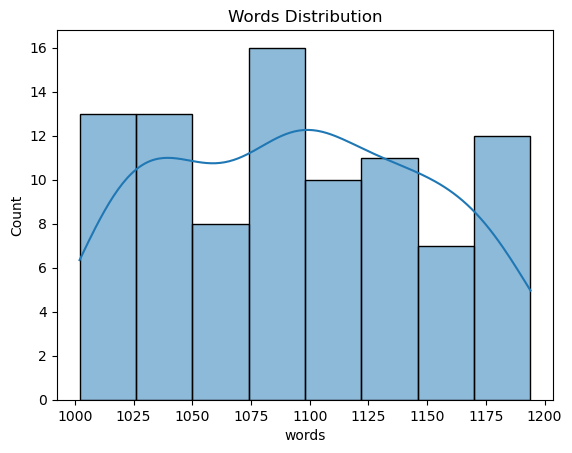

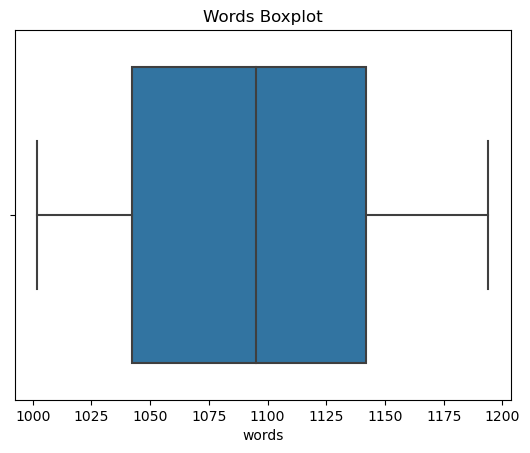

In [22]:
# Q3a (code): Check data distribution
# For histogram
sns.histplot(df['words'], kde=True)
plt.title('Words Distribution')
plt.show()

# For boxplot
sns.boxplot(x=df['words'])
plt.title('Words Boxplot')
plt.show()

In [23]:
# Q3b (code): compute some descriptive statistics
df.describe()


,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.139553,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.155706,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.233333,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.050658,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.134234,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.243243,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.571429,0.491349


In [24]:
# Q3c (code): Check for any missing values
df.isnull().sum()


story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64

In [26]:
# Q3d (code): replace all the NA values with zeros and check again Q3c

df.fillna(0, inplace=True)
df.isnull().sum()

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

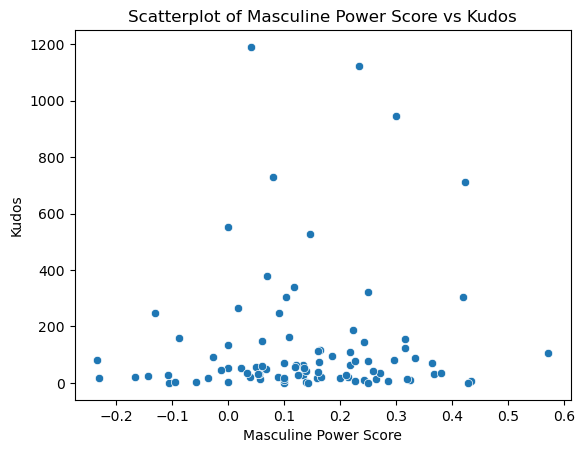

In [27]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos

sns.scatterplot(data=df, x='masculine_power_score', y='kudos')
plt.title('Scatterplot of Masculine Power Score vs Kudos')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')
plt.show()

**Q5. Multiple Regression and Analysis**

In [28]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary

import statsmodels.api as sm

# Select independent variables
X = df[['masculine_power_score', 'published_year', 'words']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Define the dependent variable
y = df['kudos']

# Perform the multiple linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     5.651
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00139
Time:                        12:20:26   Log-Likelihood:                -608.19
No. Observations:                  90   AIC:                             1224.
Df Residuals:                      86   BIC:                             1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.985e+

**Q6. Interpret the results of the regression analysis**

# Q6a (words): Interpret the R-squared and Adj. R-squared
The R-squared value of 0.165 suggests that 16.5% of the variability in kudos can be explained by the independent variables in the model (masculine_power_score, published_year, and words). This indicates a modest level of explanatory power, suggesting that while these variables do contribute to understanding variations in kudos, a substantial portion of the variation remains unexplained by this model.

The Adjusted R-squared value of 0.136 is slightly lower than the R-squared value, which is expected as it adjusts for the number of predictors in the model. This adjustment is made to account for the addition of variables that may not contribute to the model's explanatory power. The adjusted R-squared provides a more accurate measure of the model's effectiveness for predicting the dependent variable, especially when comparing models with different numbers of predictors.

# Q6b (words): Interpret F-test result
The F-statistic of 5.651 with a Prob (F-statistic) of 0.00139 indicates that the model is statistically significant. This means that there is a significant difference between the model with the predictors (masculine_power_score, published_year, and words) and a model with no predictors at all. The low p-value (0.00139) associated with the F-statistic strongly suggests that the observed R-squared is not purely by chance, and at least one of the predictors is likely to have a significant linear relationship with the dependent variable, kudos.

# Q6c (words): Interpret coefficients and t-test result
const (6.985e+04): The constant term represents the expected value of kudos when all independent variables are held at zero. Its significance suggests a baseline level of kudos that could be expected in the absence of the effects of the included predictors.

masculine_power_score (77.4713): This coefficient indicates the change in kudos associated with a one-unit increase in masculine_power_score, all else being equal. However, with a p-value of 0.596, this variable is not statistically significant, suggesting that masculine_power_score does not have a strong linear relationship with kudos within this dataset.

published_year (-34.3797): The negative coefficient for published_year suggests that kudos decrease with each additional year. This variable is statistically significant (p < 0.000), indicating that the year of publication is inversely related to the number of kudos a story receives, with more recent stories tending to receive fewer kudos.

words (-0.3175): This coefficient suggests a slight decrease in kudos with each additional word, holding other variables constant. However, with a p-value of 0.439, this effect is not statistically significant, indicating that the number of words does not have a significant impact on kudos in the model.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [32]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test

from scipy import stats

# Predicting and calculating residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Shapiro-Wilk test
_, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk test p-value: {p_value}')

Shapiro-Wilk test p-value: 2.3473965826692478e-12


# Q7b (words): Write your analysis for the Normality Test there:

The Shapiro-Wilk test result with a p-value strongly suggests that the residuals from our model do not follow a normal distribution. This p-value is far below the common significance level of 0.05, leading us to reject the null hypothesis of normality. Consequently, this might indicate that the assumptions of the OLS regression regarding the distribution of residuals are not fully satisfied. This non-normality could impact the reliability and validity of certain inferences drawn from the model, such as hypothesis tests and confidence intervals.

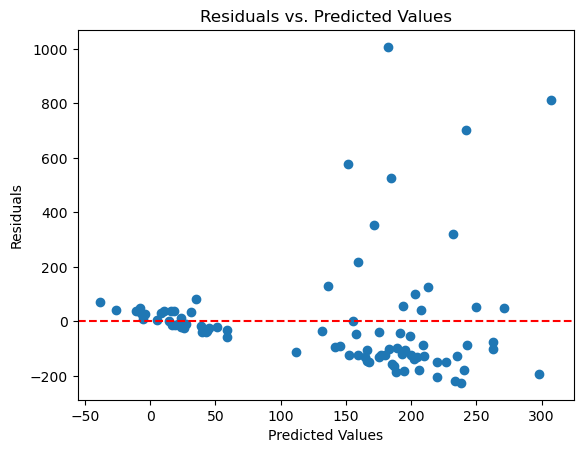

In [35]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

plt.scatter(y_pred, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

# Q7d (words): Write your analysis for the Homoscedasticity Test here:
From the plot of residuals versus predicted values, it's evident that there's no clear pattern in the distribution of residuals around the zero line. Although there isn't a clear pattern that would suggest non-linearity or heteroscedasticity, we can see that the residuals do not exhibit constant variance as there are several outliers, especially for higher values of predicted kudos. The presence of outliers and the spread of residuals could potentially indicate heteroscedasticity, where the variance of errors differs across levels of the independent variables. 

**Q8: Multicollinearity**

In [38]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for the intercept
X = add_constant(df[['masculine_power_score', 'published_year', 'words']])

# Create a DataFrame to hold VIF scores
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                 Feature            VIF
0                  const  606665.119079
1  masculine_power_score       1.006348
2         published_year       1.004453
3                  words       1.001894


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

# Q8b (words): Write your analysis for the multicollinearity test here:

The Variance Inflation Factor (VIF) results for the independent variables indicate that there is no significant multicollinearity affecting the model. With VIF values for `masculine_power_score`, `published_year`, and `words` all being very close to 1, we can infer that these predictors do not suffer from multicollinearity that would inflate the variance of the estimated regression coefficients.

However, the extremely high VIF value for the constant term is unusual and warrants further investigation. Typically, the VIF for the constant term should not be considered, but the presence of such a large number can sometimes indicate numerical issues or underlying multicollinearity that might not be reflected in the individual VIF scores. This might stem from having variables that are not properly scaled or a data range that varies widely across predictors. Additionally, the large condition number as seen in the regression output also points to potential numerical instability in the regression analysis. This could be a sign of multicollinearity not detected by VIF or scaling issues with the data.

**Q9: Reflection**

# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?
Riveter takes too long while calculating the score assignment. Perhaps we can optimise it by applying parallel processing.
While a multiple linear regression model was chosen for analysis, the assumptions for linear regression were not entirely met, as indicated by the residual analysis. Advanced work could involve exploring different types of models that are less sensitive to these assumptions, such as tree-based models or robust regression methods.
There were outliers in the residuals plot. We could look into these outliers and check whether they represent special cases or data issues that need to be addressed.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.